# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
# connect to Kaggle API

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
  !kaggle datasets download "shrutimechlearn/churn-modelling"
  !unzip /content/churn-modelling.zip

churn-modelling.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/churn-modelling.zip
replace Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# DATA UNDERSTANDING

## Load Dataset

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Check Data Info

In [ ]:
# cek data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Check Missing Value

In [ ]:
# cek missing value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Statistik Deskriptif Data

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA

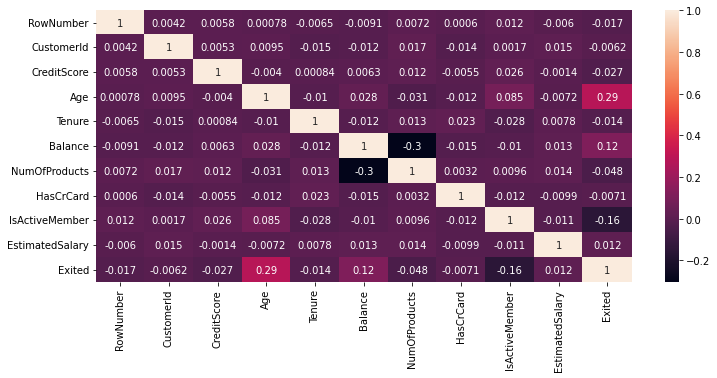

In [ ]:
plt.figure(figsize = (12,5))
sns.heatmap(data = df.corr(), annot = True)
plt.show()

## Jumlah Customer Berdasarkan Geography dan Gender

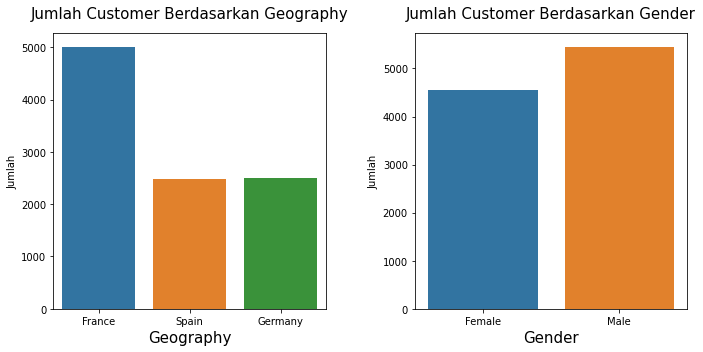

In [ ]:
# jumlah customer

fig, ax = plt.subplots(ncols = 2, figsize = (10,5))

cols = ['Geography', 'Gender']
for i, col in enumerate(cols):
    sns.countplot(x = col, data = df, ax = ax[i])
    ax[i].set_title(f'Jumlah Customer Berdasarkan {col}', fontsize = 15, pad = 15)
    ax[i].set_xlabel(f'{col.title()}', fontsize = 15)
    ax[i].set_ylabel('Jumlah')
plt.tight_layout()
plt.show()

## Perbandingan Jumlah Churn dan Tidak Churn

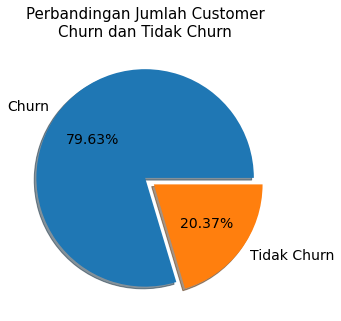

In [ ]:
plt.figure(figsize = (10,5))
labels = 'Churn', 'Tidak Churn'
plt.pie(x = df['Exited'].value_counts(),
        labels = labels,
        textprops = {'fontsize' : 14},
        autopct='%1.2f%%',
        shadow = True,
        explode = (0, 0.1))
plt.title('Perbandingan Jumlah Customer\nChurn dan Tidak Churn', fontsize = 15)
plt.show()

## Perbandingan Jumlah Customer Aktif dan Tidak

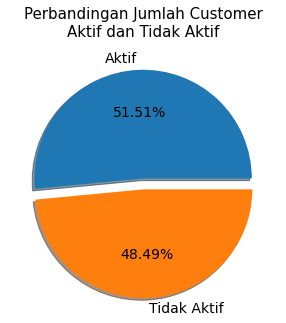

In [ ]:
plt.figure(figsize = (10,5))
labels = 'Aktif', 'Tidak Aktif'
plt.pie(x = df['IsActiveMember'].value_counts(),
        labels = labels,
        textprops = {'fontsize' : 14},
        autopct='%1.2f%%',
        shadow = True,
        explode = (0, 0.1))
plt.title('Perbandingan Jumlah Customer\nAktif dan Tidak Aktif', fontsize = 15)
plt.show()

## Perbandingan Cutomer yang Memiliki Kartu Kredit dan Tidak

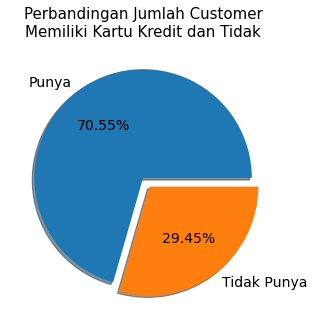

In [ ]:
plt.figure(figsize = (10,5))
labels = 'Punya', 'Tidak Punya'
plt.pie(x = df['HasCrCard'].value_counts(),
        labels = labels,
        textprops = {'fontsize' : 14},
        autopct='%1.2f%%',
        shadow = True,
        explode = (0, 0.1))
plt.title('Perbandingan Jumlah Customer\nMemiliki Kartu Kredit dan Tidak', fontsize = 15)
plt.show()

## Persebaran Usia Customer dan Credit Score

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


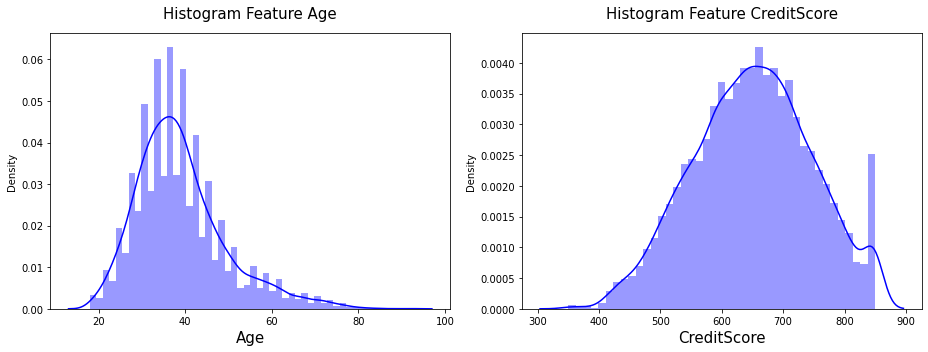

In [ ]:
 cols = ['Age', 'CreditScore']

 fig, ax = plt.subplots(ncols = 2, figsize = (13,5))
 for i, col in enumerate(cols):
     sns.distplot(df[col], color = 'blue', ax = ax[i])
     ax[i].set_title(f'Histogram Feature {col}', fontsize = 15, pad = 15)
     ax[i].set_xlabel(f'{col}', fontsize = 15)
plt.tight_layout()
plt.show()

# DATA UNDERSTANDIUNG REPORT



*   Data yang digunakan diperoleh dari Kaggle Open Dataset.
*   Data tidak memiliki missing value.
*   Customer pria lebih banyak dari wanita.
*   Sebanyak `79.63%` customer termasuk ke dalam kategori churn dan `20.37%` termasuk kategori tidak churn.
*   Perbandingan customer aktif dan tidak aktif tidak terlalu signifikan dimana sebanyak `51.51%` merupakan customer aktif dan `48.49%` merupakan customer tidak aktif.
* Sebanyak `70.55%` customer memiliki kartu kredit.
*   Usia customer sebagian besar berada direntag 25 - 40 tahun.
* Terdapat beberapa kolom yang tidak digunakan sehingga harus diremove ditahap preparation.
* Kolom `Gender` perlu dilakukan label encoding.



# DATA PREPARATION

## Drop Kolom yang Tidak Digunakan

In [ ]:
df.drop(columns = ['Surname'], axis = 1, inplace = True)
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.feature_selection import RFE

## Melakukan One-Hot Encoding Kolom Gender

---



In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df['Gender'] = ohe.fit_transform(df['Gender'].values.reshape(-1,1)).toarray()
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,1.0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,1.0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,1.0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,1.0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,1.0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'] = df['Geography'].replace(['France', 'Spain', 'Germany'], [0.0, 1.0, 2.0])

df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0.0,1.0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,1.0,1.0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0.0,1.0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0.0,1.0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,1.0,1.0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].value_counts()

0.0    5014
2.0    2509
1.0    2477
Name: Geography, dtype: int64

## Splitting Dataset

---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X = df.copy()
y = X.pop('Exited')

In [ ]:
X.shape, y.shape

((10000, 12), (10000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Melakukan Scaling Dataset

---

In [ ]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

Karena dataset bukan merupakan data dengan distribusi normal, maka scaling menggunakan `MinMaxScaler`

In [ ]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in numerical_features:
  sc = MinMaxScaler()
  sc.fit(X_train_scale[[col]])

  X_train_scale[[col]] = sc.transform(X_train_scale[[col]])
  X_test_scale[[col]] = sc.transform(X_test_scale[[col]])

In [ ]:
X_scale = X.copy()

In [ ]:
for col in numerical_features:
  sc = MinMaxScaler()
  sc.fit(X_scale[[col]])

  X_scale[[col]] = sc.transform(X_scale[[col]])

## Melakukan Oversampling Data

---

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train)

In [ ]:
y_train.value_counts()

0    5590
1    1410
Name: Exited, dtype: int64

In [ ]:
y_train_smote.value_counts()

0    5590
1    5590
Name: Exited, dtype: int64

# Modeling

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix

In [ ]:
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

## Using 10 fold-cross validation

---

In [ ]:
model_list = {
    'Logistic Regression': LogisticRegression(random_state=1),
    'XGBoost': XGBClassifier(random_state=1)
}

In [ ]:
cv_list = {}

for name, model in model_list.items():
  cv = cross_val_score(model, X_scale, y, cv=10)
  cv_list[name] = cv

In [ ]:
for name, score in cv_list.items():
  print(f'{name} = {score.mean()}')

Logistic Regression = 0.808
XGBoost = 0.86


## Using scaled dataset

---

In [ ]:
model_list = {
    'Logistic Regression': LogisticRegression(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'XGBoost': XGBClassifier(random_state=1)
}

In [ ]:
y_pred_list = {}

for name, model in model_list.items():
  rfe = RFE(estimator=model, n_features_to_select=10)
  _ = rfe.fit(X_train_scale, y_train)
  model.fit(rfe.transform(X_train_scale), y_train)
  y_pred_list[name] = model.predict(rfe.transform(X_test_scale))

scores = get_score(y_pred_list, y_test, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.791000,0.395500,0.500000,0.441653,0.500000
Random Forest,0.865000,0.837072,0.720453,0.756415,0.720453
XGBoost,0.865000,0.841981,0.716345,0.753635,0.716345


In [ ]:
for name, pred in y_pred_list.items():
  print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, pred)}\n\n")

Confusion Matrix for Logistic Regression:
[[2373    0]
 [ 627    0]]


Confusion Matrix for Random Forest:
[[2299   74]
 [ 331  296]]


Confusion Matrix for XGBoost:
[[2306   67]
 [ 338  289]]




## Using scaled balance dataset

---

In [ ]:
model_list = {
    'Logistic Regression': LogisticRegression(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'XGBoost': XGBClassifier(random_state=1)
}

In [ ]:
y_pred_list = {}

for name, model in model_list.items():
  rfe = RFE(estimator=model, n_features_to_select=10)
  _ = rfe.fit(X_train_smote, y_train_smote)
  model.fit(rfe.transform(X_train_smote), y_train_smote)
  y_pred_list[name] = model.predict(rfe.transform(X_test_scale))

scores = get_score(y_pred_list, y_test, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.507000,0.503121,0.504718,0.459071,0.504718
Random Forest,0.846333,0.773340,0.733296,0.749875,0.733296
XGBoost,0.854333,0.787307,0.745981,0.763215,0.745981


In [ ]:
for name, pred in y_pred_list.items():
  print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, pred)}\n\n")

Confusion Matrix for Logistic Regression:
[[1207 1166]
 [ 313  314]]


Confusion Matrix for Random Forest:
[[2201  172]
 [ 289  338]]


Confusion Matrix for XGBoost:
[[2212  161]
 [ 276  351]]




In [ ]:
! python3 --version

Python 3.7.13
